4. K-Means и EM-алгоритм: практика

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn import mixture

from sklearn.model_selection import GridSearchCV

Задание 4.1
2 points possible (graded)
Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [19]:
data = pd.read_csv('data/snsdata.zip')
data = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1) 
print(f'Columns count - {data.shape[1]}')
print(f'Rows count - {data.shape[0]}')

Columns count - 36
Rows count - 30000


Задание 4.2
1 point possible (graded)
Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [20]:
s_sc = preprocessing.StandardScaler()
X = data.values
scaled_data = s_sc.fit_transform(X)
print(f'Zero element is - {scaled_data[0][0]}')

Zero element is - -0.3322172643985876


Задание 4.3
1 point possible (graded)
Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [21]:
k_m = cluster.KMeans(n_clusters=9, random_state=42)

k_m.fit(scaled_data)

print(f'Inertia is - {k_m.inertia_}')

Inertia is - 856276.696246784


Задание 4.4
2 points possible (graded)
Сколько подростков относится к наиболее многочисленному кластеру?

In [22]:
y = k_m.predict(scaled_data)

for elem in set(y):
    print(f'{elem} count is {list(y).count(elem)}')

0 count is 2201
1 count is 19599
2 count is 4284
3 count is 902
4 count is 941
5 count is 851
6 count is 1
7 count is 467
8 count is 754


In [23]:
data.loc[:, 'label'] = k_m.labels_
data.label.value_counts()

label
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

Задание 4.5
2 points possible (graded)
1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

  нет ответа 
 
2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, выберите наименьшее количество кластеров из подходящих.

Внимание: программа может выполняться несколько минут — будьте готовы подождать.

In [24]:
inert_list = []
for i  in range(3, 10):
    k_m = cluster.KMeans(n_clusters=i, random_state=42)
    k_m.fit(scaled_data)
    inert_list.append(k_m.inertia_)

<Axes: >

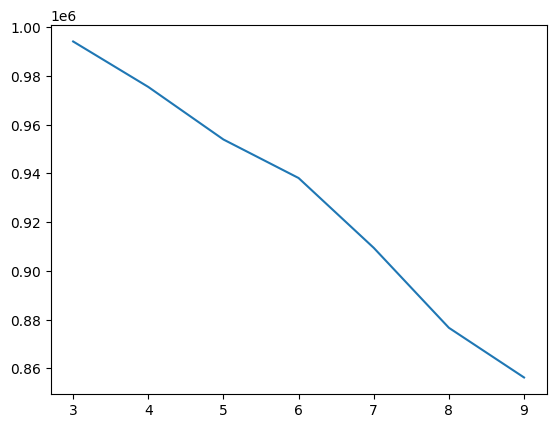

In [25]:
sns.lineplot(
    y= inert_list, 
    x= range(3, 10))

In [70]:
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouette = []
for clust_num in range(3, 10):
    silhouette.append(get_silhouette(clust_num, scaled_data))

<Axes: >

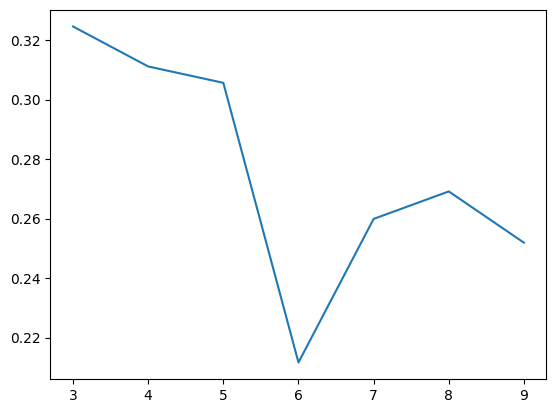

In [27]:
sns.lineplot(
    y= silhouette, 
    x= range(3, 10))

Задание 4.6
2 points possible (graded)
Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

Отметьте эти слова:

In [29]:
k_m = cluster.KMeans(n_clusters=3, random_state=42)
k_m.fit(scaled_data)
y = k_m.predict(scaled_data)
df = pd.DataFrame(scaled_data, columns=data.columns)
df['y']=y
data['y']=y

ValueError: Shape of passed values is (30000, 36), indices imply (30000, 37)

In [ ]:
pop_df = data.groupby(by='y').mean()

In [ ]:
pop_df.iloc[0].nlargest(10)

music       0.579956
god         0.329563
dance       0.251528
band        0.243406
hair        0.203843
shopping    0.190568
cute        0.180480
rock        0.164279
soccer      0.150830
football    0.149345
Name: 0, dtype: float64

In [ ]:
pop_df.iloc[1].nlargest(10)

hair      3.232804
sex       2.431217
music     2.262787
kissed    1.567901
die       1.209877
rock      1.113757
god       1.003527
band      0.972663
dance     0.967372
drugs     0.951499
Name: 1, dtype: float64

In [ ]:
pop_df.iloc[2].nlargest(10)

music         1.053973
dance         0.988602
shopping      0.935132
god           0.884009
cute          0.794670
hair          0.727958
church        0.667784
basketball    0.666946
mall          0.658900
football      0.596044
Name: 2, dtype: float64

In [ ]:
top_list = []
for label, group in data.groupby('y'):
    # print(group)
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)
    print(top_list)

set.intersection(*top_list)

[{'soccer', 'rock', 'god', 'dance', 'hair', 'music', 'shopping', 'football', 'cute', 'band'}]
[{'soccer', 'rock', 'god', 'dance', 'hair', 'music', 'shopping', 'football', 'cute', 'band'}, {'die', 'band', 'sex', 'rock', 'kissed', 'god', 'dance', 'hair', 'drugs', 'music'}]
[{'soccer', 'rock', 'god', 'dance', 'hair', 'music', 'shopping', 'football', 'cute', 'band'}, {'die', 'band', 'sex', 'rock', 'kissed', 'god', 'dance', 'hair', 'drugs', 'music'}, {'dance', 'god', 'hair', 'basketball', 'church', 'shopping', 'mall', 'football', 'cute', 'music'}]


{'dance', 'god', 'hair', 'music'}

Задание 4.7
1 point possible (graded)
Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [ ]:
g_m = mixture.GaussianMixture(n_components=3, random_state=42)
y = g_m.fit_predict(scaled_data)

for elem in set(y):
    print(f'{elem} count is {list(y).count(elem)}')

0 count is 20670
1 count is 2874
2 count is 6456


In [ ]:
g_m = mixture.GaussianMixture(n_components=3, random_state=42)
predictions = g_m.fit_predict(scaled_data)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([20670,  2874,  6456], dtype=int64))

In [ ]:
predictions

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

Задание 4.8
2 points possible (graded)
В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:



In [ ]:
data['y']=y
pop_df = data.groupby(by='y').mean()

In [ ]:
pop_df.iloc[1].nlargest(3)

hair     1.609255
music    1.584899
sex      1.322199
Name: 1, dtype: float64

7. Итоговая практика по алгоритмам кластеризации

Задание 7.2
1 point possible (graded)
Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [41]:
data = pd.read_csv('data/CC_GENERAL (1).zip')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [42]:
print(f'Nan items in dataset {data.isna().sum().sum()}')

Nan items in dataset 314


Задание 7.3
1 point possible (graded)
Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [43]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
print(f"Min MINIMUM_PAYMENTS value {data['MINIMUM_PAYMENTS'].mean()}")

Min MINIMUM_PAYMENTS value 864.2065423050827


Задание 7.4
1 point possible (graded)
Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя.

Не забудьте предварительно удалить признак CUST_ID — он не поможет при кластеризации, так как не несёт никакой содержательной информации.

In [44]:
data = data.drop(['CUST_ID'], axis=1)

st_sc = preprocessing.StandardScaler()
X_norm = st_sc.fit_transform(data)

print(f"First normalized value is {X_norm[0][0]}")

First normalized value is -0.7319893664465486


Задание 7.5
1 point possible (graded)
Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42.

<Axes: >

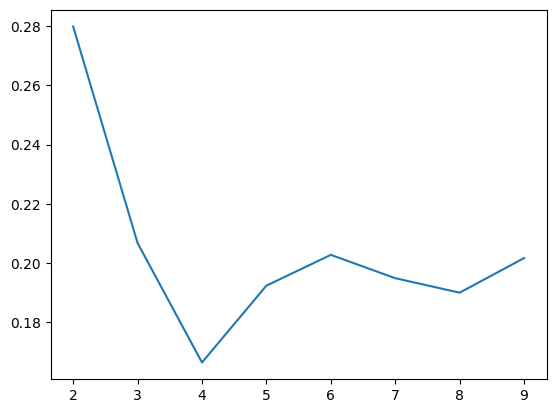

In [71]:
silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))
    
sns.lineplot(
    x=range(2, 10),
    y=silhouette
)

Задание 7.6
1 point possible (graded)
Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [53]:
km = cluster.KMeans(n_clusters=3)
y = km.fit_predict(X_norm)

for i in set(y):
    print(f'group {i} has {list(y).count(i)} members')

group 0 has 3892 members
group 1 has 4479 members
group 2 has 579 members


Задание 7.7
1 point possible (graded)
Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

In [63]:
dbs = cluster.DBSCAN()
y = dbs.fit(X_norm)
print(f'Dataset has {len(set(y.labels_))-1} clusters')

Dataset has 38 clusters


Задание 7.8
3 points possible (graded)
В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

In [ ]:
params = {"eps":np.arange(0.1,3,0.2), 
          "min_samples":range(1,20,4)}

grid_search = GridSearchCV(
    estimator=cluster.DBSCAN(), 
    param_grid=params, 
    scoring=metrics.silhouette_score(),
    cv=3, 
    n_jobs = -1
)  
%time grid_search.fit(X_norm) 

# y_test_pred = grid_search.predict(X_test)
# y_train_pred = grid_search.predict(X_train)

# print(f'F1 test data: {metrics.f1_score(y_test, y_test_pred):.4f}')
# print(f'F1 train data: {metrics.f1_score(y_train, y_train_pred):.4f}')
# print(f"Наилучшие значения гиперпараметров: {grid_search.best_params_}")

c:\Projects\DS\lessons\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
  warnings.warn(


CPU times: total: 2.11 s
Wall time: 27.6 s


GridSearchCV(cv=3, estimator=DBSCAN(), n_jobs=-1,
             param_grid={'eps': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9]),
                         'min_samples': range(1, 20, 4)},
             scoring=<function silhouette_score at 0x000001764F7677E0>)

In [73]:
result = []
for eps in np.arange(0.1,3,0.2):
    for min_samples in range(1,20,4):
        dbs = cluster.DBSCAN(eps=eps, min_samples=min_samples)
        y = dbs.fit(X_norm)
        sil = metrics.silhouette_score(X_norm, dbs.labels_, metric='euclidean')
        print(eps, min_samples, sil)
        result.append({'eps':eps, 'min_samples': min_samples, 'sil': sil})
           
result


0.1 1 0.016088101678116043
0.1 5 -0.37480763495802677
0.1 9 -0.25356488418531886
0.1 13 -0.2436145630317598
0.1 17 -0.2501812991771469
0.30000000000000004 1 0.022678660017728367
0.30000000000000004 5 -0.42447460395317227
0.30000000000000004 9 -0.40420939636920766
0.30000000000000004 13 -0.35198371916868315
0.30000000000000004 17 -0.35259593550295876
0.5000000000000001 1 -0.14501241385518446
0.5000000000000001 5 -0.4437013266683457
0.5000000000000001 9 -0.31765746320613075
0.5000000000000001 13 -0.13380219141974145
0.5000000000000001 17 -0.18647706862226324
0.7000000000000001 1 -0.2612758090201566
0.7000000000000001 5 -0.43883698908601104
0.7000000000000001 9 -0.3260020902287138
0.7000000000000001 13 -0.270490209893498
0.7000000000000001 17 -0.2664710582213962
0.9000000000000001 1 -0.36335889649837005
0.9000000000000001 5 -0.35917534461115475
0.9000000000000001 9 -0.08109625986258492
0.9000000000000001 13 0.06343609339685843
0.9000000000000001 17 -0.0409176997396811
1.1000000000000003 1

[{'eps': 0.1, 'min_samples': 1, 'sil': 0.016088101678116043},
 {'eps': 0.1, 'min_samples': 5, 'sil': -0.37480763495802677},
 {'eps': 0.1, 'min_samples': 9, 'sil': -0.25356488418531886},
 {'eps': 0.1, 'min_samples': 13, 'sil': -0.2436145630317598},
 {'eps': 0.1, 'min_samples': 17, 'sil': -0.2501812991771469},
 {'eps': 0.30000000000000004, 'min_samples': 1, 'sil': 0.022678660017728367},
 {'eps': 0.30000000000000004, 'min_samples': 5, 'sil': -0.42447460395317227},
 {'eps': 0.30000000000000004, 'min_samples': 9, 'sil': -0.40420939636920766},
 {'eps': 0.30000000000000004, 'min_samples': 13, 'sil': -0.35198371916868315},
 {'eps': 0.30000000000000004, 'min_samples': 17, 'sil': -0.35259593550295876},
 {'eps': 0.5000000000000001, 'min_samples': 1, 'sil': -0.14501241385518446},
 {'eps': 0.5000000000000001, 'min_samples': 5, 'sil': -0.4437013266683457},
 {'eps': 0.5000000000000001, 'min_samples': 9, 'sil': -0.31765746320613075},
 {'eps': 0.5000000000000001, 'min_samples': 13, 'sil': -0.1338021914

In [78]:
r = pd.DataFrame(result)
r.sort_values('sil', ascending=False).iloc[0]

eps            2.900000
min_samples    5.000000
sil            0.617345
Name: 71, dtype: float64

Задание 7.9
1 point possible (graded)
Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.


In [79]:
for n_clusters in range(3, 10):
    agl = cluster.AgglomerativeClustering(n_clusters=n_clusters)
    y = agl.fit(X_norm)
    sil = metrics.silhouette_score(X_norm, agl.labels_, metric='euclidean')
    print(n_clusters, sil)

3 0.1731098007232828
4 0.1547093352037027
5 0.15806867978666445
6 0.17335577924064002
7 0.156415467090623
8 0.15203451293262077
9 0.15371895842035113


Задание 7.10
0/1 point (graded)
Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [87]:
agl = cluster.AgglomerativeClustering(n_clusters=6)
y = agl.fit(X_norm)

for i in set(y.labels_):
    print(f'group {i} has {list(y.labels_).count(i)} members')

group 0 has 3946 members
group 1 has 2931 members
group 2 has 864 members
group 3 has 464 members
group 4 has 23 members
group 5 has 722 members


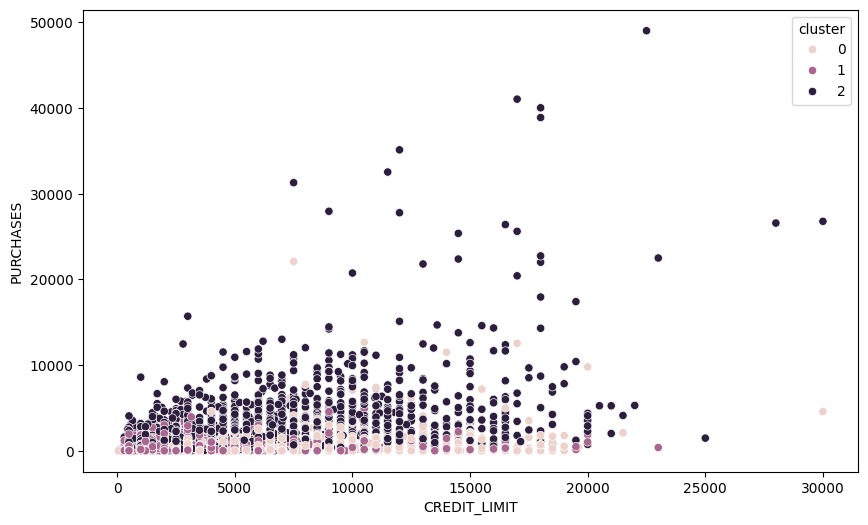

In [90]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
data['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()